In [ ]:
from app import main


X,y = main()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
import numpy as np

In [ ]:
pca.fit(X/np.max(X))

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca.get_covariance()

In [ ]:
pca.explained_variance_[0]

In [ ]:
pca.components_

In [ ]:
X2 = pca.transform(X)

In [2]:
from gome_work_flow import *
cd = cdl_utils()
gome = GNOME_utils(cd)
g = Gome_workflow()


C:\Users\Bowen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from datetime import date, timedelta
date_ = date(2016, 5,1)
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
gome_path = convertGOMEDate(date_, prefix)

In [4]:
lon_belt = np.arange(-105, -80, 0.5)
lat_belt = np.arange(35, 50, 0.5)

lon_belt

array([-105. , -104.5, -104. , -103.5, -103. , -102.5, -102. , -101.5,
       -101. , -100.5, -100. ,  -99.5,  -99. ,  -98.5,  -98. ,  -97.5,
        -97. ,  -96.5,  -96. ,  -95.5,  -95. ,  -94.5,  -94. ,  -93.5,
        -93. ,  -92.5,  -92. ,  -91.5,  -91. ,  -90.5,  -90. ,  -89.5,
        -89. ,  -88.5,  -88. ,  -87.5,  -87. ,  -86.5,  -86. ,  -85.5,
        -85. ,  -84.5,  -84. ,  -83.5,  -83. ,  -82.5,  -82. ,  -81.5,
        -81. ,  -80.5])

In [5]:
from mpl_toolkits.basemap import Basemap, cm
from numpy import meshgrid

[[110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 ..., 
 [  3   4   5 ...,  50  51  52]
 [  2   3   4 ...,  49  50  51]
 [  1   2   3 ...,  48  49  50]]


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


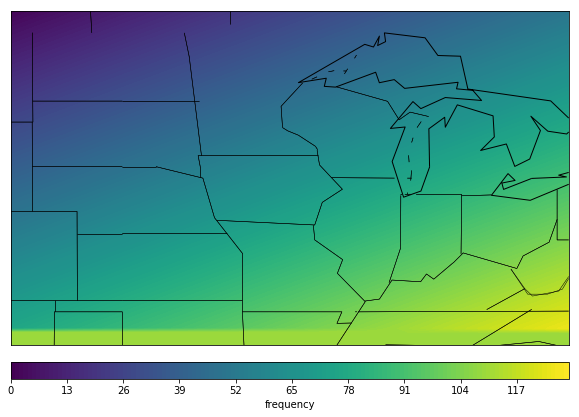

In [8]:
plt.figure(figsize=(10,10))
map = Basemap(llcrnrlon=-105,llcrnrlat=35,urcrnrlon=-80.,urcrnrlat=50.)
map.drawcoastlines()
map.drawstates()

# print(map.llcrnrx)
xx, yy = map.makegrid(50,80)

data = np.array([np.arange(50) - i + 80 for i in range(80)])
data[0:4, :] = 110
print(data)
clevs = np.arange(130)
map.contourf(xx,yy,data,clevs)
cbar = map.colorbar(location='bottom',pad="5%")
cbar.set_label('frequency')
plt.show()

In [6]:
round(3.1)

3

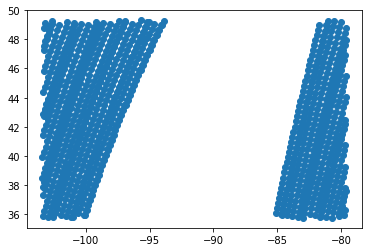

In [52]:
from math import floor
import matplotlib.pyplot as plt
%matplotlib inline




#initialize
gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -105, -78, 35, 50
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
date_ = date(2016, 7,1)
map = Basemap(llcrnrlon=-105,llcrnrlat=35,urcrnrlon=-80.,urcrnrlat=50.)
days = (date(2016, 7, 11) - date_).days

clevs = np.arange(240)/4
lon_belt = np.arange(-105, -80, 0.5)
lat_belt = np.arange(35, 50, 0.5)
xx, yy = map.makegrid(len(lon_belt),len(lat_belt))


    



#testing gome 

p = convertGOMEDate(date_, prefix)
gome.load_gnome(p, new_date)
plt.scatter(gome.lons, gome.lats)
plt.figure()





def baseplot(lat_belt, lon_belt, window_size, prefix, gome):
    
    
    """
    date_ is the starting date
    days are the number of days in the sliding window workflow
    lat belt is the latitude array
    lon belt is the longitude array
    window size is the size of the sliding window
    prefix for the prefix of gome path
    gome is a gome_utils object 
    
    plot the footprint coverage of GOME or (OCO2)
    
    """
    
    #initialize
    gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -105, -78, 35, 50
    prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
    date_ = date(2016, 6,15)
    map = Basemap(llcrnrlon= min(lon_belt),llcrnrlat= min(lat_belt), urcrnrlon= max(lon_belt),urcrnrlat= max(lat_belt))
    days = (date(2016, 7, 1) - date_).days

#     clevs = np.arange(240)/4
    xx, yy = map.makegrid(len(lon_belt),len(lat_belt))
    
    #workflow
    for l in range(days//10):
        print('new 10 days window')
        footprint_mat = np.zeros((len(lat_belt), len(lon_belt)))
        for k in range(window_size):
            try:
                new_date = date_ + timedelta(l*10 + k)
                print('newdate', new_date)
                gome_path = convertGOMEDate(new_date, prefix)
                gome.load_gnome(gome_path, new_date)
                for lon,lat in zip(gome.lons, gome.lats):

                    lon_integer, lat_integer, lon_round, lat_round = floor(lon), floor(lat), round(lon), round(lat)

                    lon_index = int((lon_integer - min(lon_belt))*2 + lon_round - lon_integer)
                    lat_index = int((lat_integer - min(lat_belt))*2 + lat_round - lat_integer)

                    if lat_index < 0 or lat_index >= footprint_mat.shape[0] or lon_index < 0 or lon_index >= footprint_mat.shape[1]:
                        continue
                    footprint_mat[lat_index, lon_index] += 1
            except Exception as e:
                print(e)
                continue

        plt.figure(figsize=(10,10))
        map.drawcoastlines()
        map.drawstates()
        map.contourf(xx, yy, footprint_mat, cmap = cm.GMT_no_green)
        cbar = map.colorbar(location='bottom',pad="5%")
        cbar.set_label('frequency')
        plt.title(str(date_ + timedelta(l*10)) + ' to '+ str(date_ + timedelta(l*10+ window_size - 1)))
        plt.savefig(str(date_ + timedelta(l*10)) + ' to '+ str(date_ + timedelta(l*10+ window_size -1)) + 'without_filter.png')

new 10 days window
newdate 2016-06-15
newdate 2016-06-16
newdate 2016-06-17
newdate 2016-06-18
newdate 2016-06-19
newdate 2016-06-20
newdate 2016-06-21
newdate 2016-06-22
newdate 2016-06-23
newdate 2016-06-24
newdate 2016-06-25
newdate 2016-06-26
newdate 2016-06-27
newdate 2016-06-28
newdate 2016-06-29


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


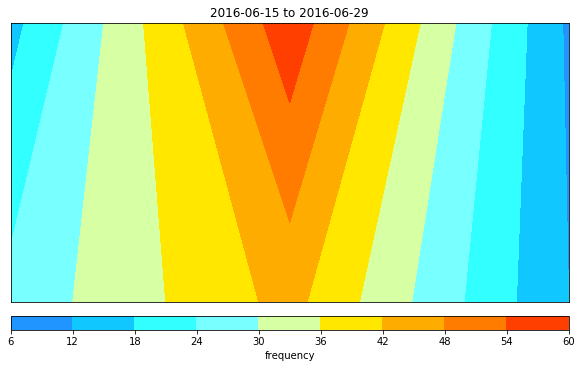

In [75]:
gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -105, -78, 35, 50
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
lon_belt = np.arange(-89.5, -88, 0.5)
lat_belt = np.arange(40.5, 41.5, 0.5)

baseplot(lat_belt, lon_belt, 15, prefix, gome)

In [49]:
from CDL_utils import *
cd = cdl_utils()


In [50]:
cd.min_lon, cd.max_lon, cd.min_lat, cd.max_lat

(-91.421028, -87.39817, 40.327146, 42.523501)